In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio
!pip install sap

In [ ]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Attribute profiles (APs)

![](img/aps.png)

## 0. Setup: Load the DSM tile and compute the max-tree

- Load the dsm tile `tile_path`.
- Compute the max-tree.

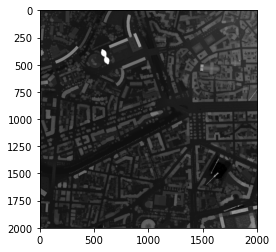

In [ ]:
tile_path = Path('./image processing/dsm_vox_50cm_tile_-12_0.tif')
dsm = None # Your turn!
image=(rio.open(tile_path)).read(1)
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
# creation of the max-tree of an image
mt = sap.MaxTree(image)

## 1. Create the (max) attribute profiles of the DSM 

Compute the attribute profiles of the DSM with the max-tree *only* (normally it's min and max tree).

- Choose an attribute (e.g. `area`)
- Set several thresholds (e.g. `[1000, 10000, 100000]`)
- Filter the tree according to these thresholds, stack the filtered images!
- Display the profiles (as in the intro image)

In [ ]:
# Your turn!

#computing the area attributes of the nodes
area = mt.get_attribute('area')
print("area attribute in vector: ",area)

#setting threshold
area_profile = sap.create_profiles(mt, {'area': [1000, 10000, 100000]})
apvector = area_profile.vectorize()

#filtering and stacking the threshold images
rgb = np.dstack((apvector[1],apvector[2],apvector[3]))

area attribute in vector:  [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.003860e+06 4.003861e+06
 4.004001e+06]


Total:   0%|          | 0/4 [00:00<?, ?it/s]

area:   0%|          | 0/4 [00:00<?, ?it/s]

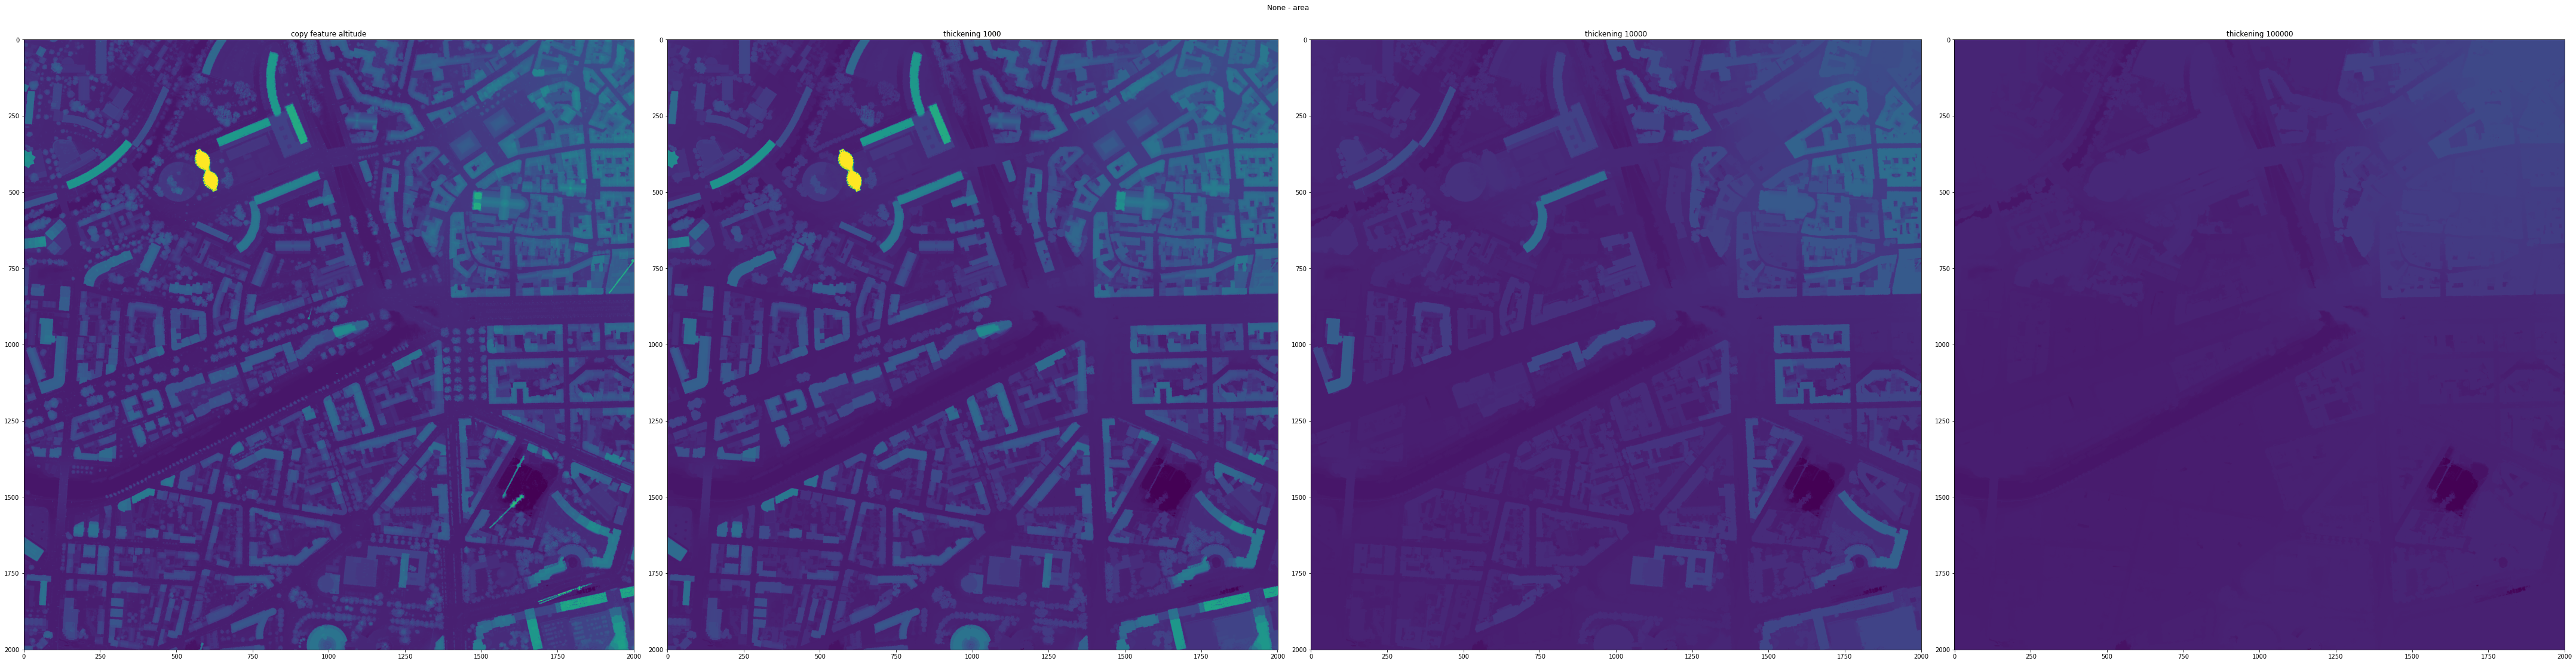

In [ ]:
#displaying all th profiles created after applying filtering
sap.profiles.show_all_profiles(area_profile, height=15)

The above profiles shows original image and profile with areas greater than 1000, 10000, 100000 respectively. This is an easiest method to threshold an image based on area attribute for a pixel region.

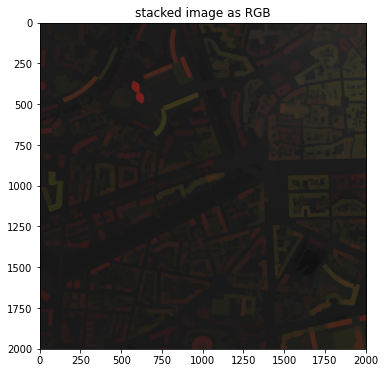

In [ ]:
#display
plt.figure(figsize=(8,6))
plt.title("stacked image as RGB")
plt.imshow(rgb.astype('uint8'))

# 2. Compute the Differential APs

The differential APs allows to see the structures removed at each thresholds.

- Compute the image differences from you attribute profiles stack
- Display!

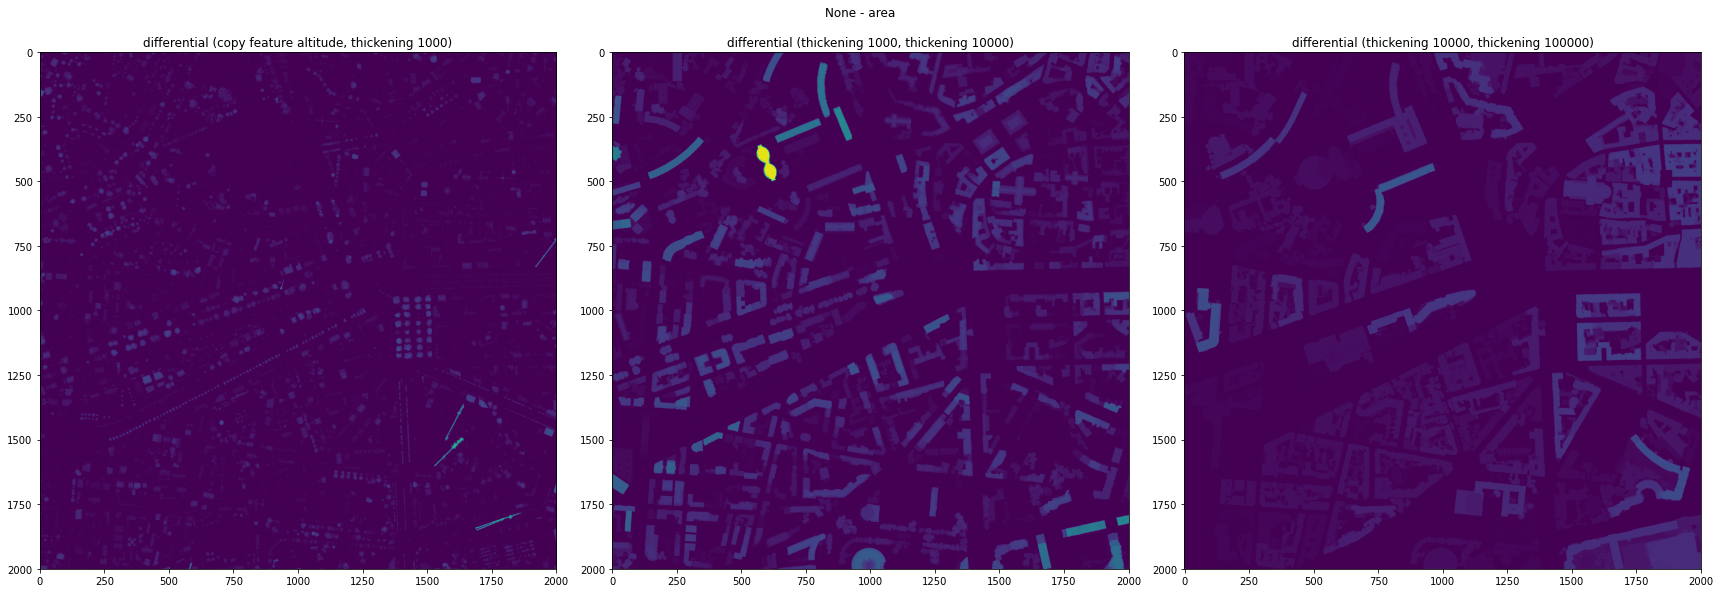

In [ ]:
# Your turn!
diff = sap.profiles.differential(area_profile)

#showing profiles for visualizing
sap.profiles.show_all_profiles(diff, height=8)

Differential profile in the above case created the difference between the succesive filtered images that were produced based on the threshold from area profile.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


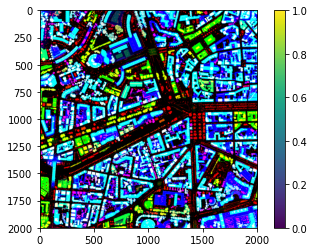

In [ ]:
#display as an rgb image
diff_dis=diff.vectorize()
d_n=np.dstack(diff_dis)
plt.imshow(d_n)
plt.colorbar()

## 3. Compute and display complete APs (min and max), Differential APs and Self-dual Attribute Profiles

In [ ]:
#min and max attribute profiles
minap = sap.create_profiles(mt,{'area': [1000, 10000, 100000]}, filtering_rule="min")
maxap = sap.create_profiles(mt,{'area': [1000, 10000, 100000]}, filtering_rule="max")

Total:   0%|          | 0/4 [00:00<?, ?it/s]

area:   0%|          | 0/4 [00:00<?, ?it/s]

Total:   0%|          | 0/4 [00:00<?, ?it/s]

area:   0%|          | 0/4 [00:00<?, ?it/s]

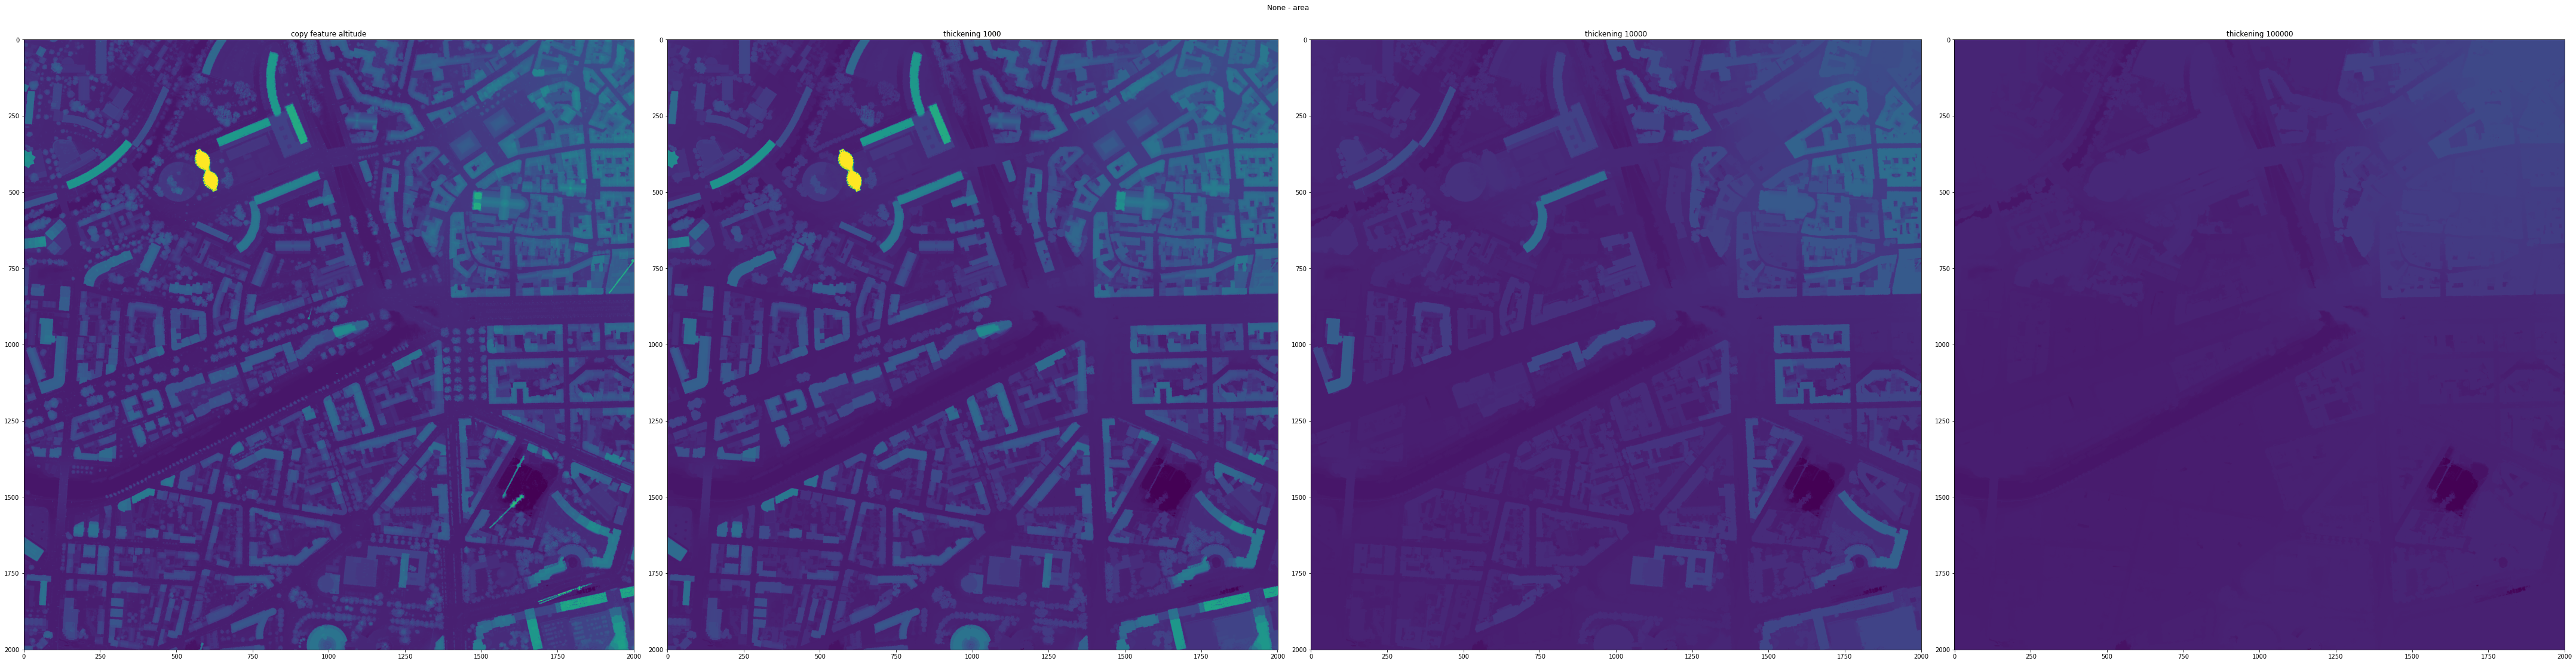

In [ ]:
#showing created attribute profiles based on max filtering
sap.profiles.show_all_profiles(maxap, height=15)

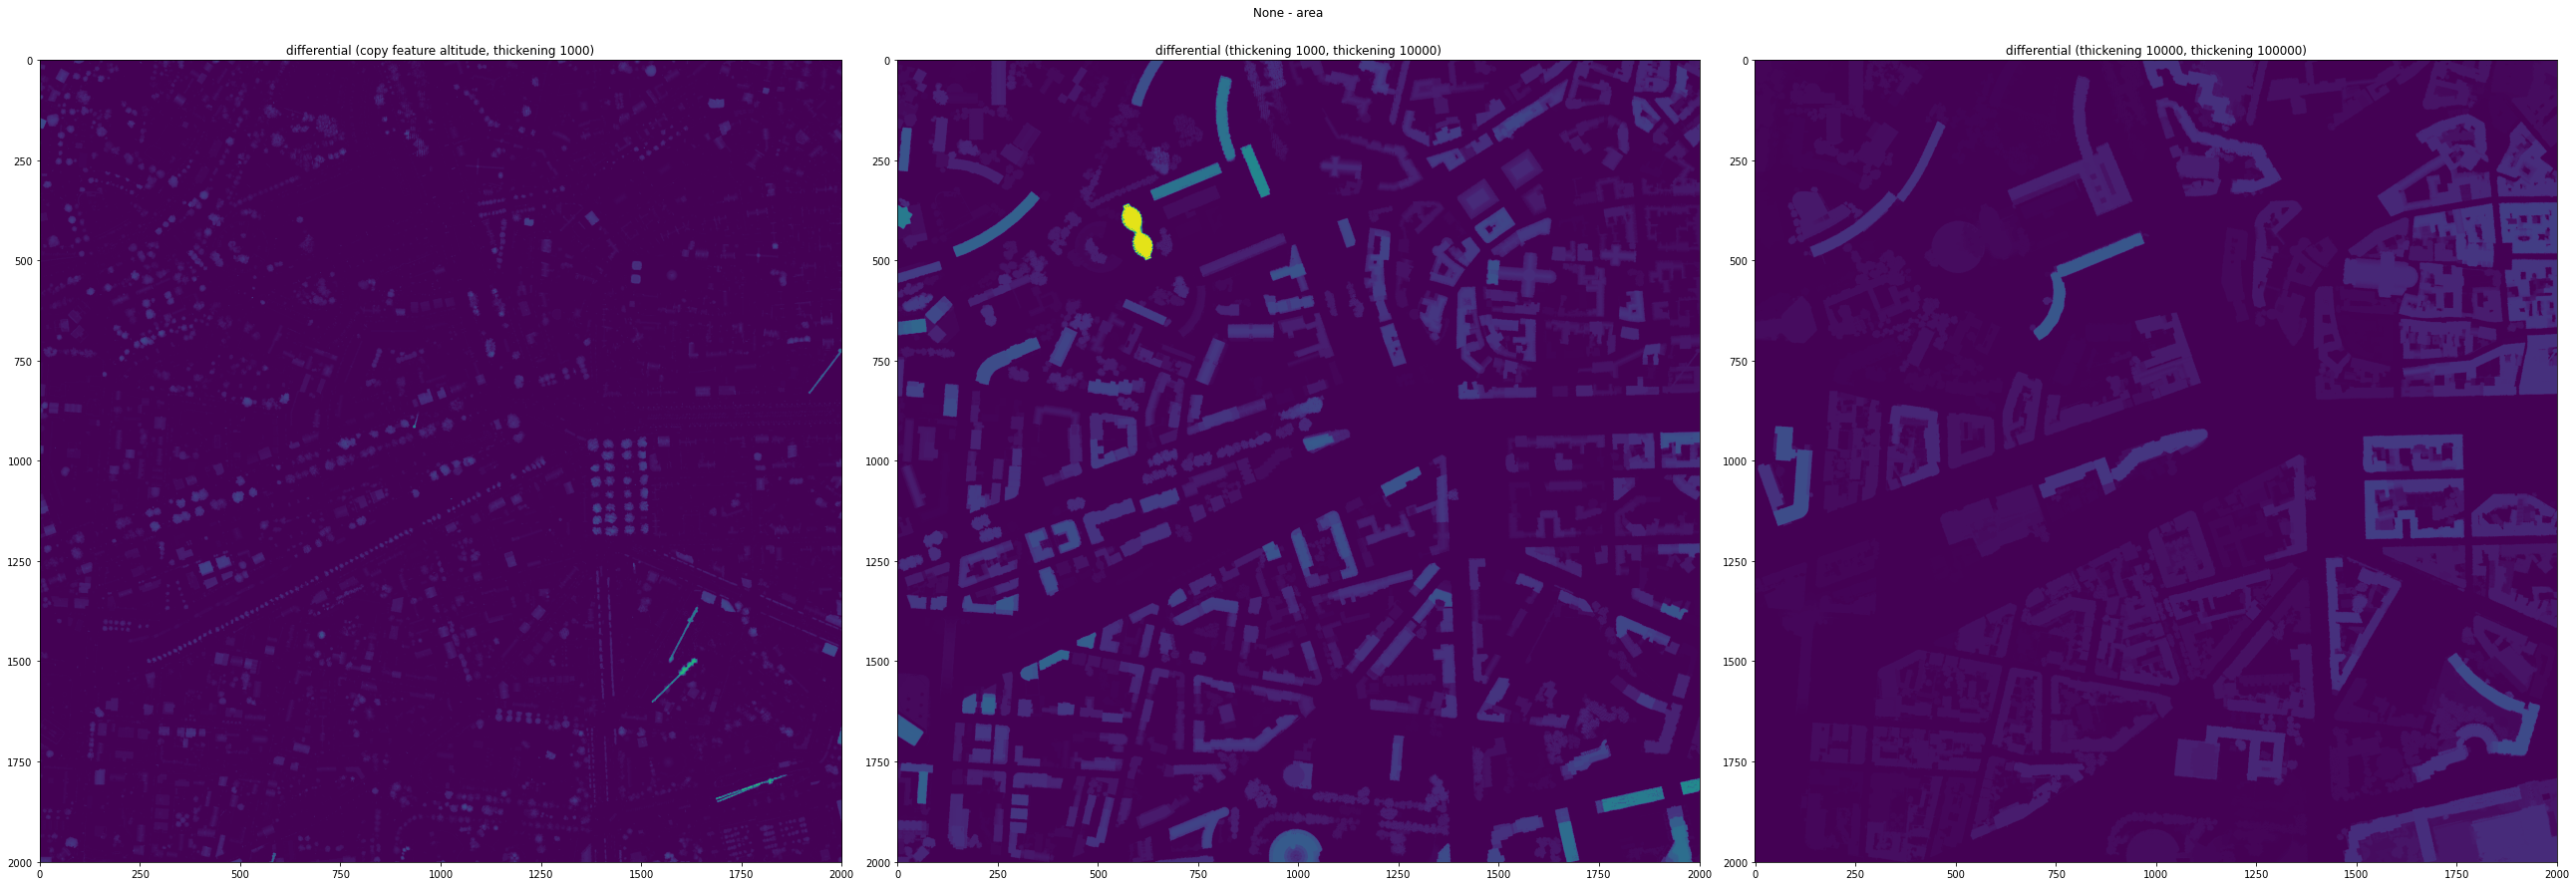

In [ ]:
# Don't panic, we'll use SAP!
#differential attribute profiles
diff_1 = sap.profiles.differential(area_profile)

#showing created attribute profiles based on max filtering
sap.profiles.show_all_profiles(diff_1, height=12)

Total:   0%|          | 0/3 [00:00<?, ?it/s]

height:   0%|          | 0/3 [00:00<?, ?it/s]

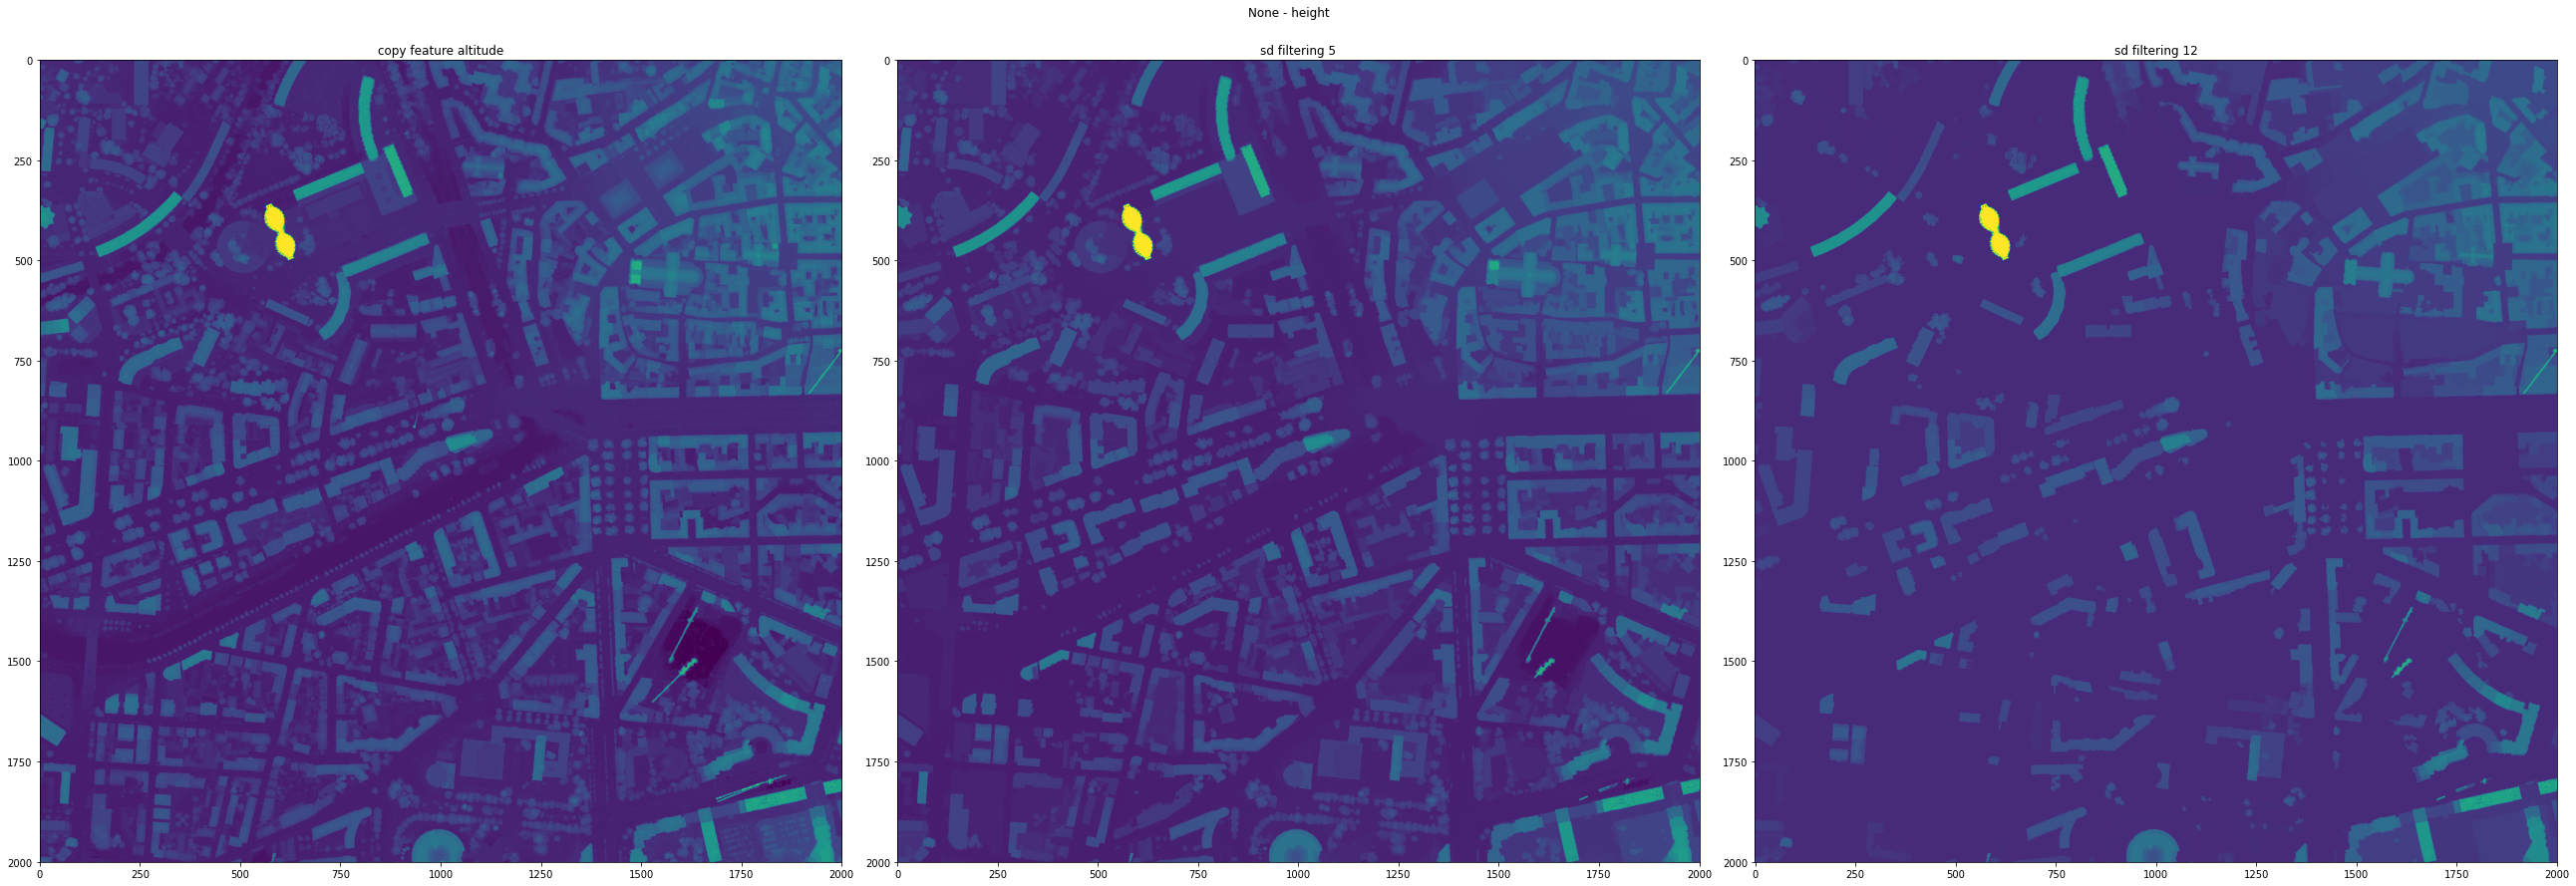

In [ ]:
#self dual attribute profiles
self_1 = sap.self_dual_attribute_profiles(image, {'height': [5, 12]})
#showing created attribute profiles based on max filtering
sap.profiles.show_all_profiles(self_1, height=12)

In the above examples, the Attribute profiles (APs) and Self Dual Attribute  profiles (SDAPs) were obtained by applying area filters on max-tree created on provided dataset. Based on several literature review, it was noticed that self-dual attribute profile is considered to be efficient method when handling spatial data as they operate simultaneously on bright and dark components of the image. 